In [1]:
# imports

from self_reflection_helper import *
from self_prediction import *
from cot import Collection

"""Imports"""
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)


import yaml

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Run CoT




In [2]:
data = Collection(["med_qa"], verbose=False)
data = data.select(split="test", number_samples=10, random_samples=True, seed=0)

Loading med_qa...
else
Loading {name}... done


In [3]:
config={
    "instruction_keys": None,
    "cot_trigger_keys": ["zhou-01"],
    "answer_extraction_keys": 'auto-kojima', 
    "author" : "thoughtsource",
    "api_service": "openai_chat",
    "api_time_interval": 1,
    "engine": "gpt-3.5-turbo", 
    "temperature": 0,
    "max_tokens": 512,
    "verbose": False,
    "warn": False
}
data.generate(config=config)
data.evaluate()
# med_qa.dump("med_qa")

Generating med_qa...


{'med_qa': {'test': {'accuracy': {'gpt-3.5-turbo': {'None_zhou-01_kojima-A-E': 0.7}}}}}

## Run reflection

In [4]:
# Choose a reflection model and template path
model = 'gpt-3.5-turbo'
template_path = "./reflection_messages/final_system_messages/first_template.yaml"
system_evaluate(data,model,template_path)

dataset_name = "med_qa_10_sample"
template = "first"
base_model = "gpt-3.5-turbo"
critique_model = "gpt-3.5-turbo"

dump_path = f"{dataset_name}_{template}_{base_model}_{critique_model}"
data.dump(dump_path+".json")

Generating med_qa...


## Run Statistics on Reflection



Average over objectives for all items
        Average
obj_1      96.0
obj_2      97.0
obj_3      94.0
obj_4      93.0
obj_5      93.0
obj_6      92.0
obj_7      91.0
obj_8      96.0
obj_9      91.0
obj_10     94.0
obj_11     97.0




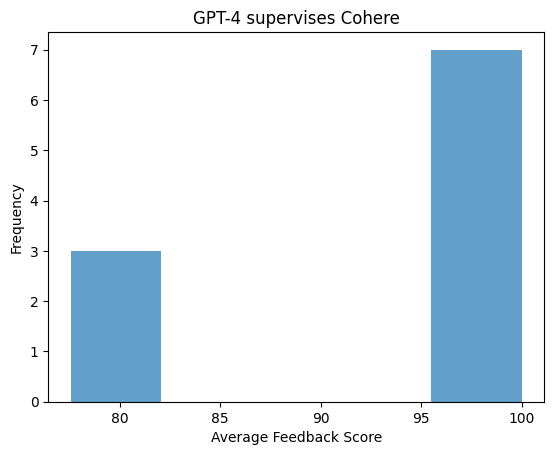

{'obj_10': [80, 100, 100, 100, 100, 100, 100], 'obj_5': [80, 100, 100, 100, 100, 100, 100], 'obj_9': [70, 100, 100, 100, 100, 100, 100], 'obj_1': [90, 100, 100, 100, 100, 100, 100], 'obj_6': [70, 100, 100, 100, 100, 100, 100], 'obj_11': [90, 100, 100, 100, 100, 100, 100], 'obj_2': [90, 100, 100, 100, 100, 100, 100], 'obj_8': [90, 100, 100, 100, 100, 100, 100], 'lowest': [70, 100, 100, 100, 100, 100, 100], 'obj_4': [80, 100, 100, 100, 100, 100, 100], 'obj_3': [80, 100, 100, 100, 100, 100, 100], 'average': [80.9090909090909, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], 'obj_7': [70, 100, 100, 100, 100, 100, 100]}
{'obj_10': [80, 100, 80], 'obj_5': [70, 100, 80], 'obj_9': [70, 100, 70], 'obj_1': [80, 100, 90], 'obj_6': [80, 100, 70], 'obj_11': [90, 100, 90], 'obj_2': [90, 100, 90], 'obj_8': [80, 100, 90], 'lowest': [70, 100, 70], 'obj_4': [70, 100, 80], 'obj_3': [80, 100, 80], 'average': [78.18181818181819, 100.0, 80.9090909090909], 'obj_7': [70, 100, 70]}
Mann-Whitney-U test
         Avera

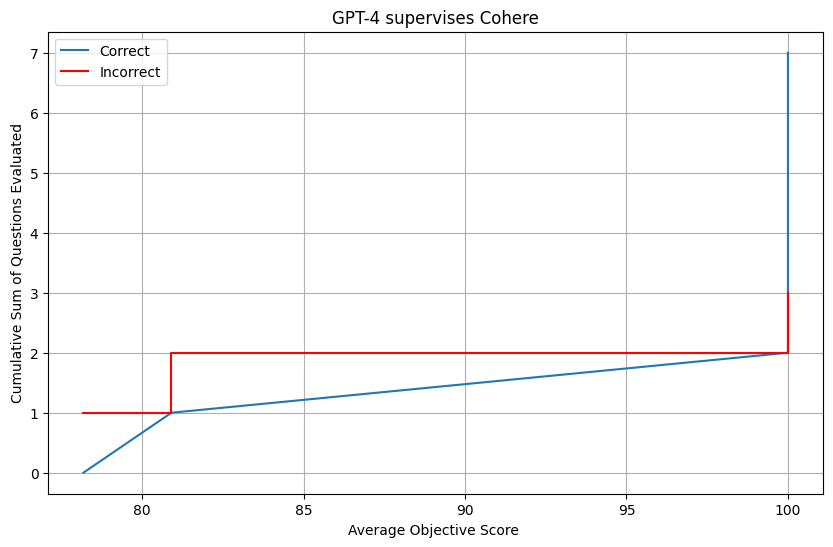

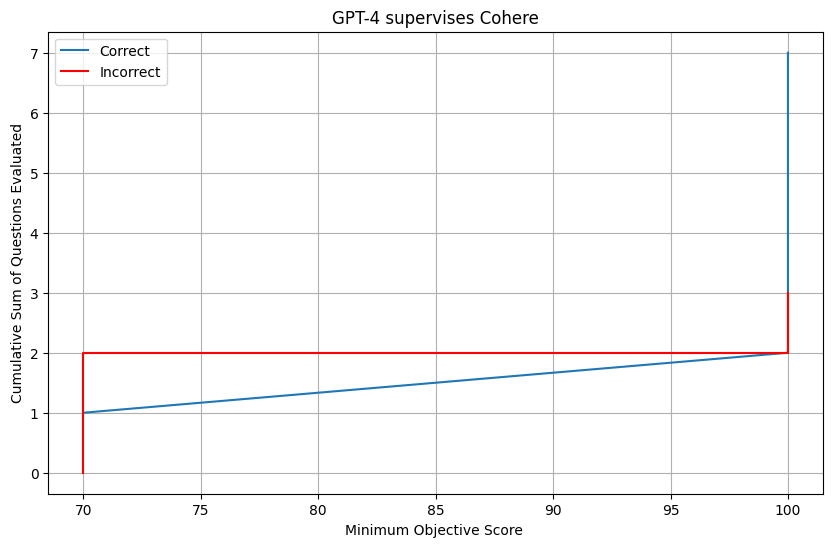

Confusion matrix:
True Negatives: 0
False Positives: 3
False Negatives: 1
True Positives: 6

Average Accuracy by LeaveOneOut strategy: 0.6
Training Accuracy: 0.8

Correlations
obj_1                     0.592157
obj_2                     0.523810
obj_3                     0.523810
obj_4                     0.575302
obj_5                     0.575302
obj_6                     0.454257
obj_7                     0.523810
obj_8                     0.592157
obj_9                     0.523810
obj_10                    0.523810
obj_11                    0.523810
lowest                    0.523810
average                   0.543852
Indicator                 1.000000
Cumulative Count          0.487544
Cumulative Count False    0.174964
Difference               -0.594647
Name: Indicator, dtype: float64




In [5]:
#Needs at least one correct and one false sample
data = Collection.from_json("med_qa_10_sample_first_gpt-3.5-turbo_gpt-3.5-turbo.json")
eval_reflection(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')
predictions(data, idx_cot=1, dataset='med_qa', split='test', plot_title='GPT-4 supervises Cohere')